- `conda activate mri`
  - (created in `0_setup.ipynb`)

---

- `jupyter lab` => open this file

---

- Selected Jupyter kernel (`ms_classification`)
  - (created in `0_setup.ipynb`)

---

---

In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(
    context='paper',
    style='whitegrid',
    font_scale=1.2,
    rc={
        'figure.dpi': 300,
        'savefig.dpi': 600,
        'font.family': 'sans-serif',
        'font.sans-serif': ['DejaVu Sans']
    }
)
sns.set_palette('colorblind')

---

In [2]:
# write down .pkl with baseline variant_test_data for analyses where others are N/A
#
#cp100 = pd.read_pickle('___4x_cal-test_combos__100x_cp__per_variant_test_data__cp_instance_col.pkl')
#cp100['ps_size'] = cp100['classes'].apply(len)
#cp100[(cp100['variant_test_data']=='baseline')].to_pickle('___4x_cal-test_combos__100x_cp__only_baseline_variant_test_data__cp_instance_col.pkl')

cp100 = pd.read_pickle('___4x_cal-test_combos__100x_cp__only_baseline_variant_test_data__cp_instance_col.pkl')
print(cp100.columns)
print(cp100.cal_test.unique())

Index(['dataset', 'scan_id', 'slice_idx', 'class', 'predicted_class',
       'is_correct', 'pred_prob_0', 'pred_prob_1', 'actual_class_pred_prob',
       'variant_test_data', 'model', 'confidence', 'credibility', 'margin',
       'classes', 'verdict', 'class_conditional', 'cp', 'run', 'cal_test',
       'ps_size'],
      dtype='object')
['dv3T-cal_dv3T-test' 'baseline3T-cal_dv3T-test'
 'baseline3T-cal_dv1.5T-test' 'dv1.5T-cal_dv1.5T-test']


---

---

Find scan in run that has prediction sets of all three possible lengths

In [3]:
df = cp100[cp100['cal_test'].isin([
    'dv3T-cal_dv3T-test',
    # 'dv1.5T-cal_dv1.5T-test'
])]
print(df['classes'].apply(len).value_counts())
print()

df = cp100[cp100['cal_test'].isin([
    # 'dv3T-cal_dv3T-test',
    'dv1.5T-cal_dv1.5T-test'
])]
print(df['classes'].apply(len).value_counts())

# group by run, scan_id
mask = (
    df.groupby(['run', 'scan_id'])['ps_size']
      .apply(lambda x: set(x) == {0, 1, 2})
)

mask

classes
1    774596
0     85404
Name: count, dtype: int64

classes
1    2270621
2     882467
0     114912
Name: count, dtype: int64


run  scan_id
0    0696        True
     0697       False
     0698       False
     0699       False
     0700       False
                ...  
99   52         False
     58          True
     60         False
     7           True
     8           True
Name: ps_size, Length: 38000, dtype: bool

---

Randomly taking last from above: `scan_id`==8 and `run`==99

---

---

Get a slice that has a prediction set of length 2

---

In [4]:
cols = ['scan_id', 'slice_idx', 'class', 'predicted_class', 'is_correct',
        'pred_prob_0', 'pred_prob_1', 'confidence', 'credibility', 'margin',
        'classes', 'verdict', 'class_conditional']

temp = df[(df['scan_id']=='8') & (df['run']==99)]
t = temp[temp.classes.apply(len)==2]
t[cols]

,scan_id,slice_idx,class,predicted_class,is_correct,pred_prob_0,pred_prob_1,confidence,credibility,margin,classes,verdict,class_conditional
65819203,8,81,1,0,False,0.993304,0.006696,0.887366,0.476923,0.364289,"[0, 1]",True,True
65819204,8,82,1,0,False,0.995026,0.004974,0.864720,0.461538,0.326258,"[0, 1]",True,True
65819205,8,83,1,0,False,0.993094,0.006906,0.889154,0.476923,0.366077,"[0, 1]",True,True


---

Using slice 82.  

Now get conformal outputs from both `class_conditional` states

---

In [5]:
temp[temp.slice_idx==82][cols]

,scan_id,slice_idx,class,predicted_class,is_correct,pred_prob_0,pred_prob_1,confidence,credibility,margin,classes,verdict,class_conditional
65802864,8,82,1,0,False,0.995026,0.004974,0.966796,0.197012,0.163807,[0],False,False
65819204,8,82,1,0,False,0.995026,0.004974,0.864720,0.461538,0.326258,"[0, 1]",True,True


---

---

Get a slice that has prediction set of length 0

---

In [6]:
temp = df[(df['scan_id']=='8') & (df['run']==99)]
t = temp[temp.classes.apply(len)==0]
print(t[['confidence', 'credibility', 'margin', 'class_conditional']].median())
t = t[cols]
print('\nnumber of rows:', len(t))
t.iloc[[0, -1]] # shorten to first and last first visibility

confidence           0.951854
credibility          0.056447
margin               0.008301
class_conditional    0.000000
dtype: float64

number of rows: 32


,scan_id,slice_idx,class,predicted_class,is_correct,pred_prob_0,pred_prob_1,confidence,credibility,margin,classes,verdict,class_conditional
65802868,8,86,1,0,False,0.949227,0.050773,0.955728,0.083564,0.039292,[],False,False
65802899,8,117,1,0,False,0.810508,0.189492,0.951854,0.059768,0.011621,[],False,False


---

Using slice 100.

Now get conformal outputs from both `class_conditional` states

---

In [7]:
temp[temp['slice_idx']==100][cols]

,scan_id,slice_idx,class,predicted_class,is_correct,pred_prob_0,pred_prob_1,confidence,credibility,margin,classes,verdict,class_conditional
65802882,8,100,1,1,True,0.498928,0.501072,0.951854,0.048146,0.000000,[],False,False
65819222,8,100,1,1,True,0.498928,0.501072,0.999404,0.669231,0.668635,[1],True,True


---

---

Now display conformal outputs with plot of actual slice

---

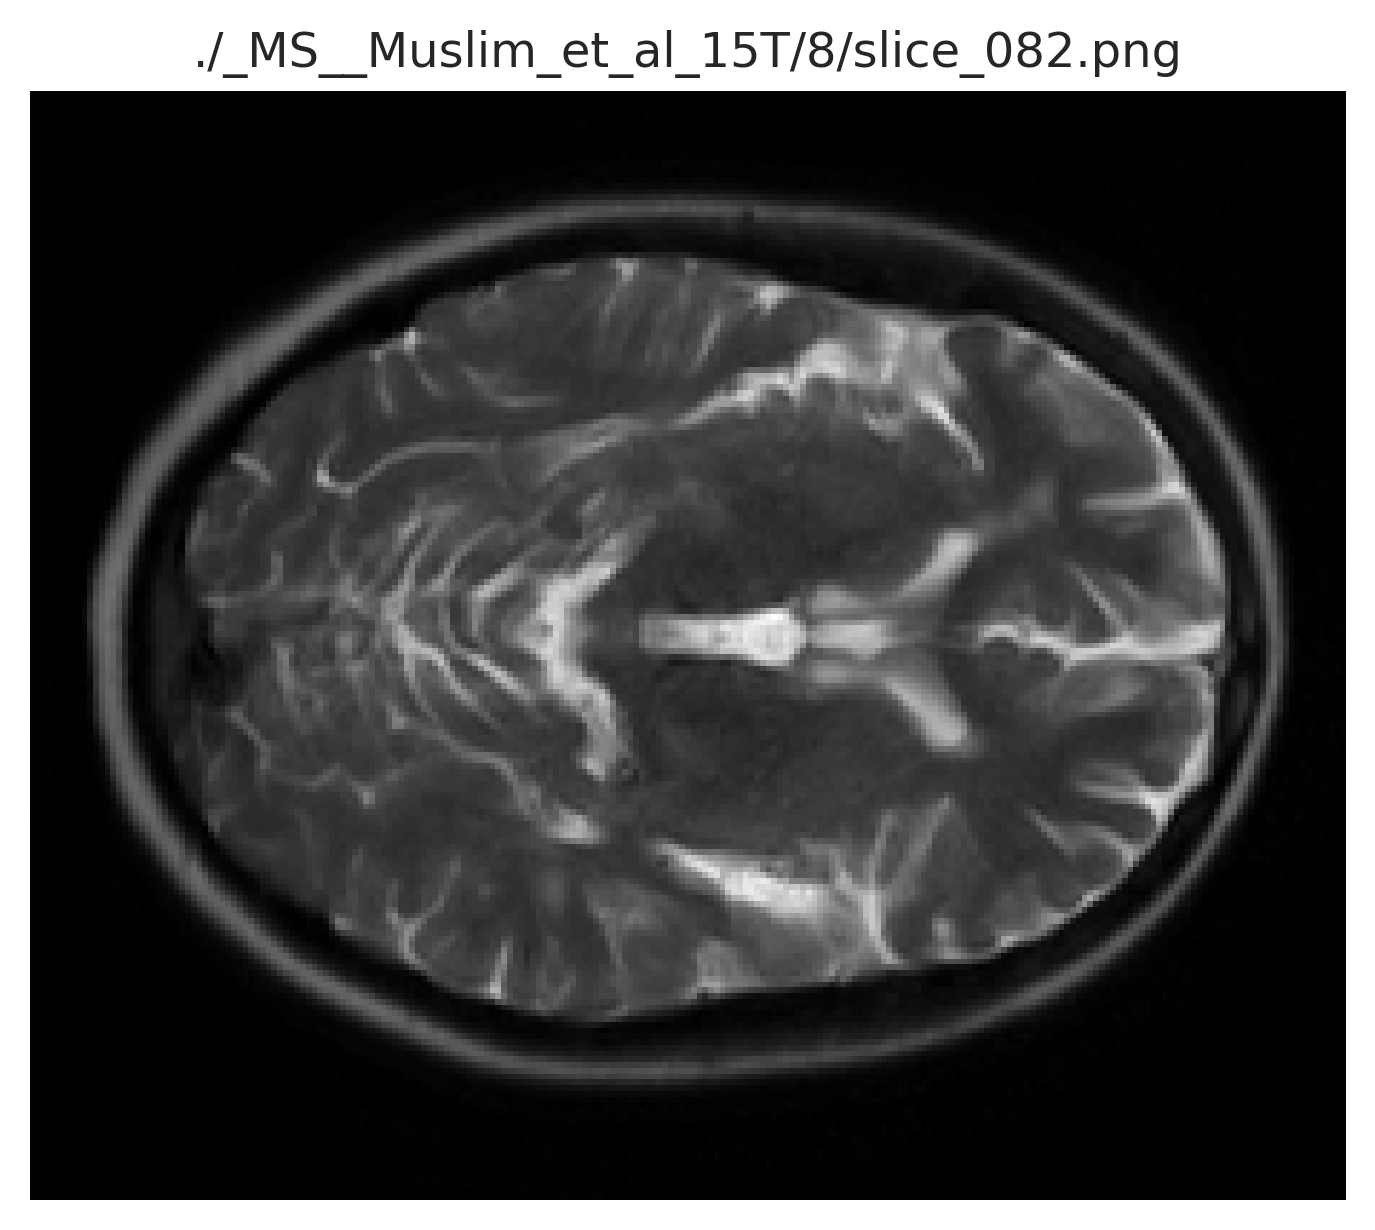

,scan_id,slice_idx,class,predicted_class,is_correct,pred_prob_0,pred_prob_1,confidence,credibility,margin,classes,verdict,class_conditional
65802864,8,82,1,0,False,0.995026,0.004974,0.966796,0.197012,0.163807,[0],False,False
65819204,8,82,1,0,False,0.995026,0.004974,0.864720,0.461538,0.326258,"[0, 1]",True,True


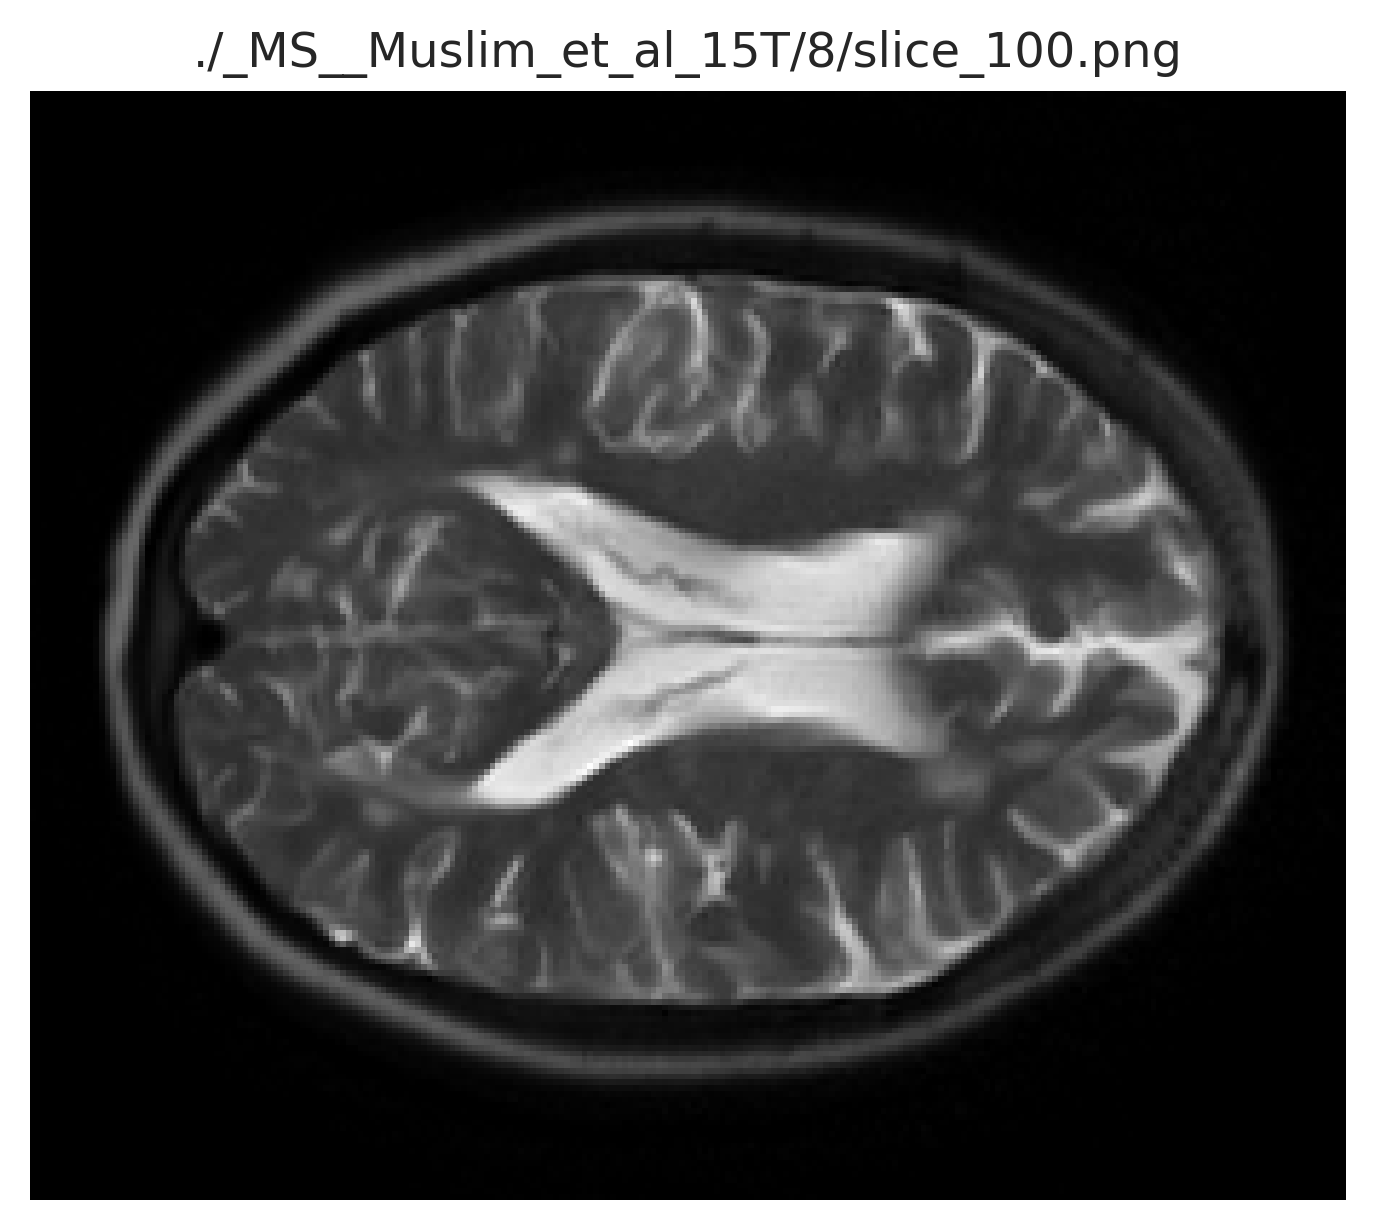

,scan_id,slice_idx,class,predicted_class,is_correct,pred_prob_0,pred_prob_1,confidence,credibility,margin,classes,verdict,class_conditional
65802882,8,100,1,1,True,0.498928,0.501072,0.951854,0.048146,0.000000,[],False,False
65819222,8,100,1,1,True,0.498928,0.501072,0.999404,0.669231,0.668635,[1],True,True


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def plot_slc(relative_path):
    # Load image
    img = mpimg.imread(relative_path)
    
    # Plot
    plt.imshow(img, cmap='grey')
    plt.axis("off")
    plt.title(relative_path)
    plt.show()


plot_slc("./_MS__Muslim_et_al_15T/8/slice_082.png")
display(temp[temp.slice_idx==82][cols])

print('\n\n')

plot_slc("./_MS__Muslim_et_al_15T/8/slice_100.png")
display(temp[temp.slice_idx==100][cols])

---

---

---

# Make Figures - Slice + Conformal P-Values

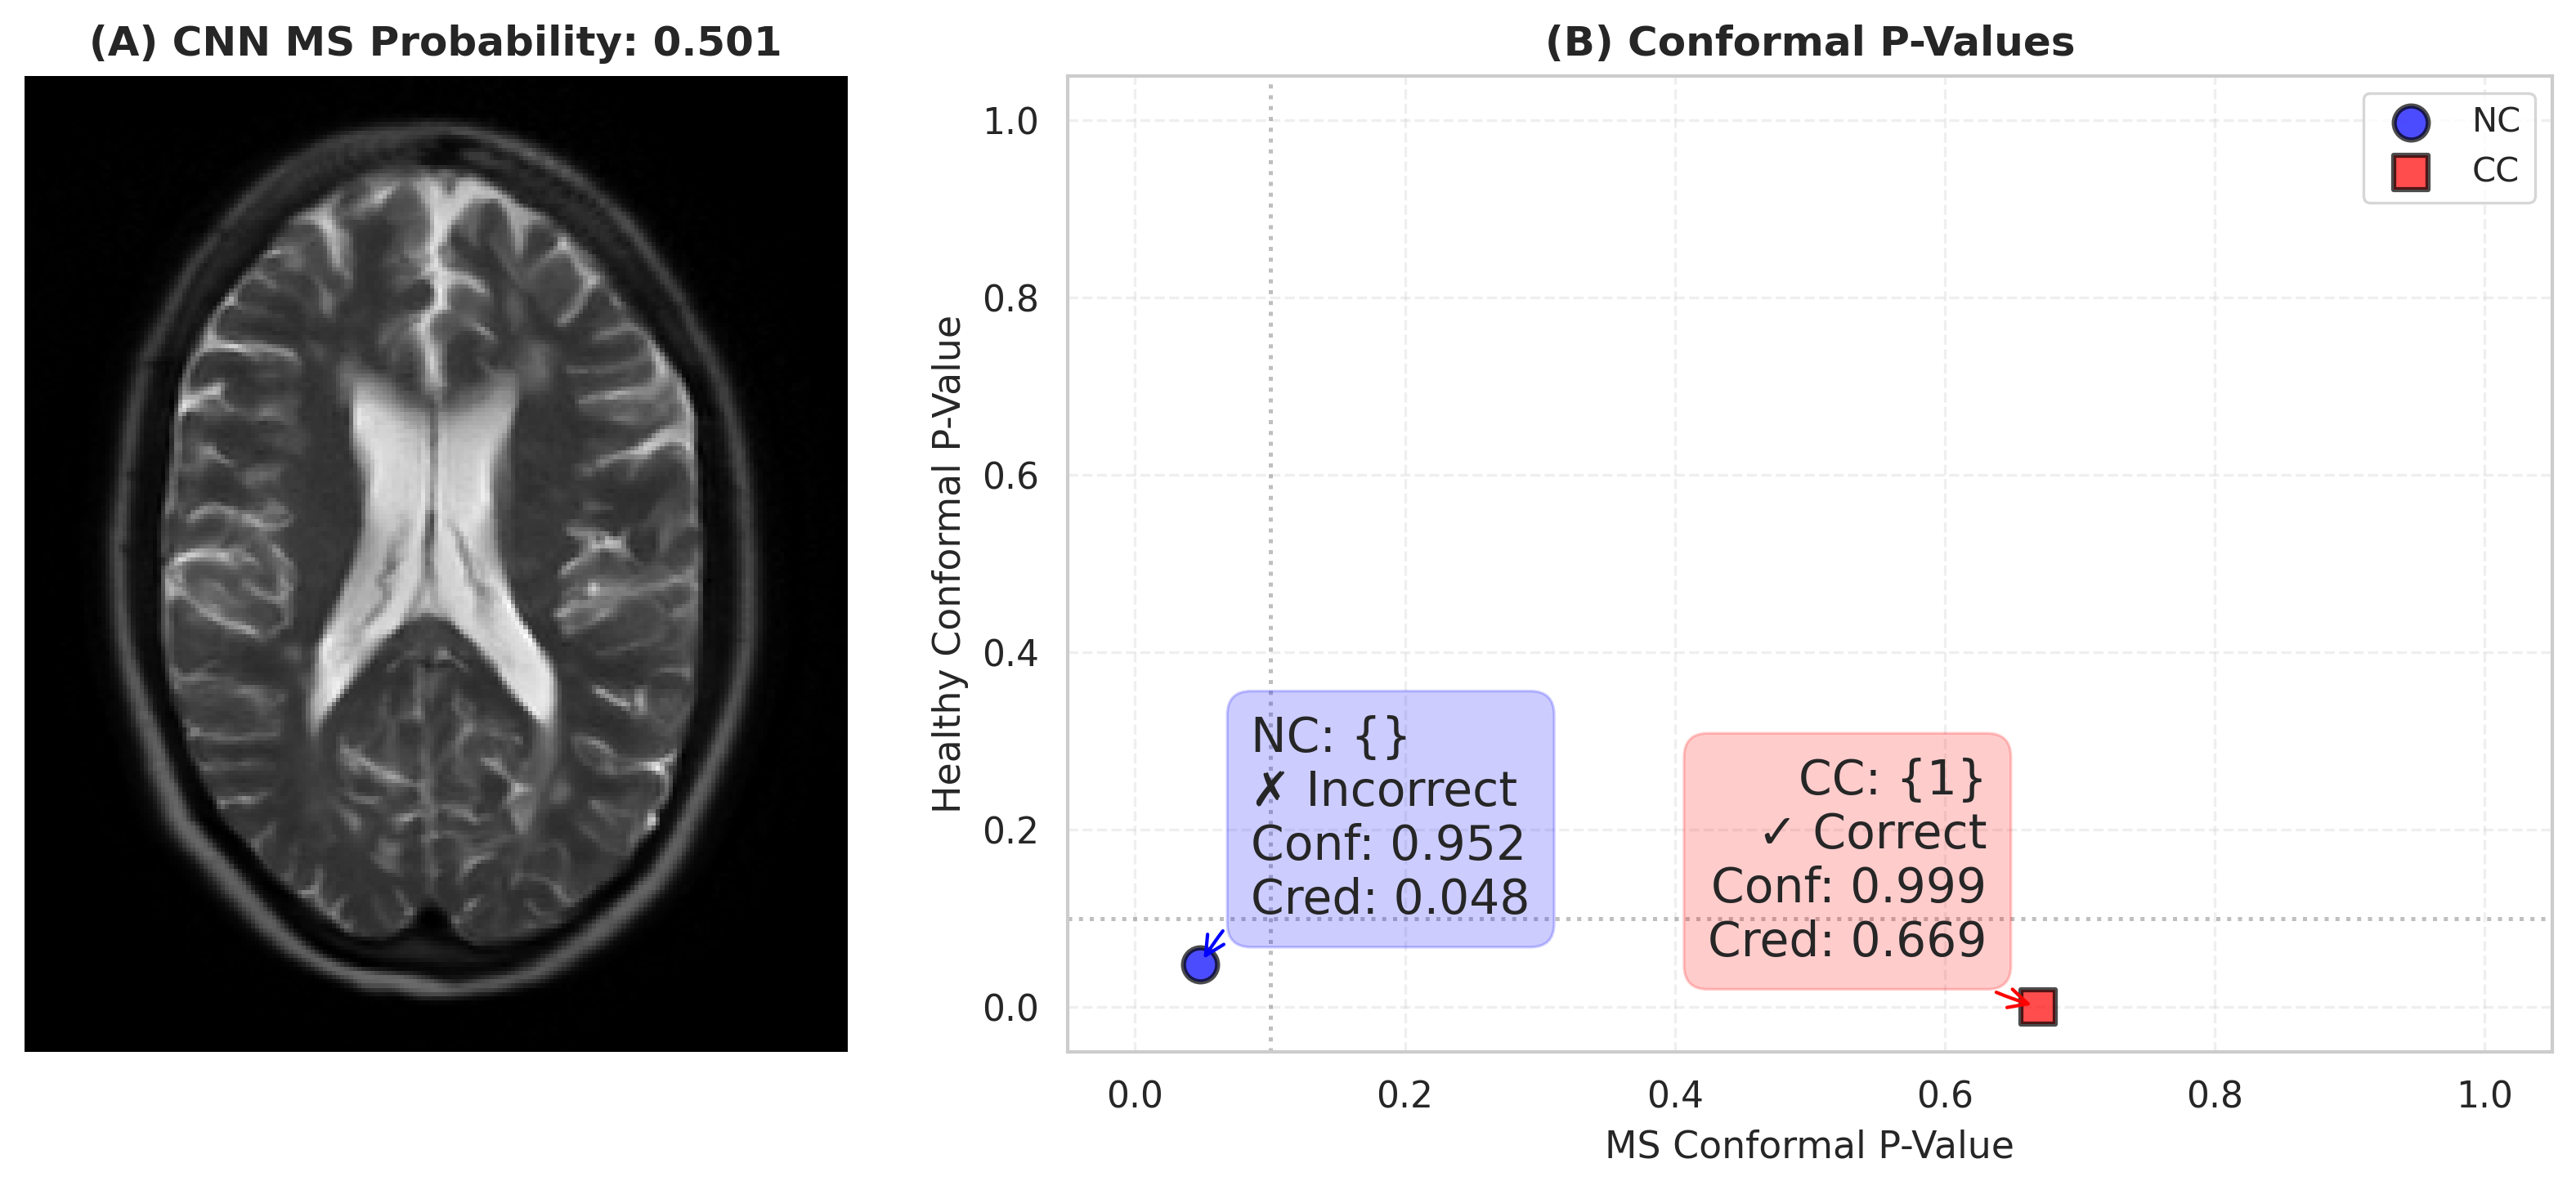

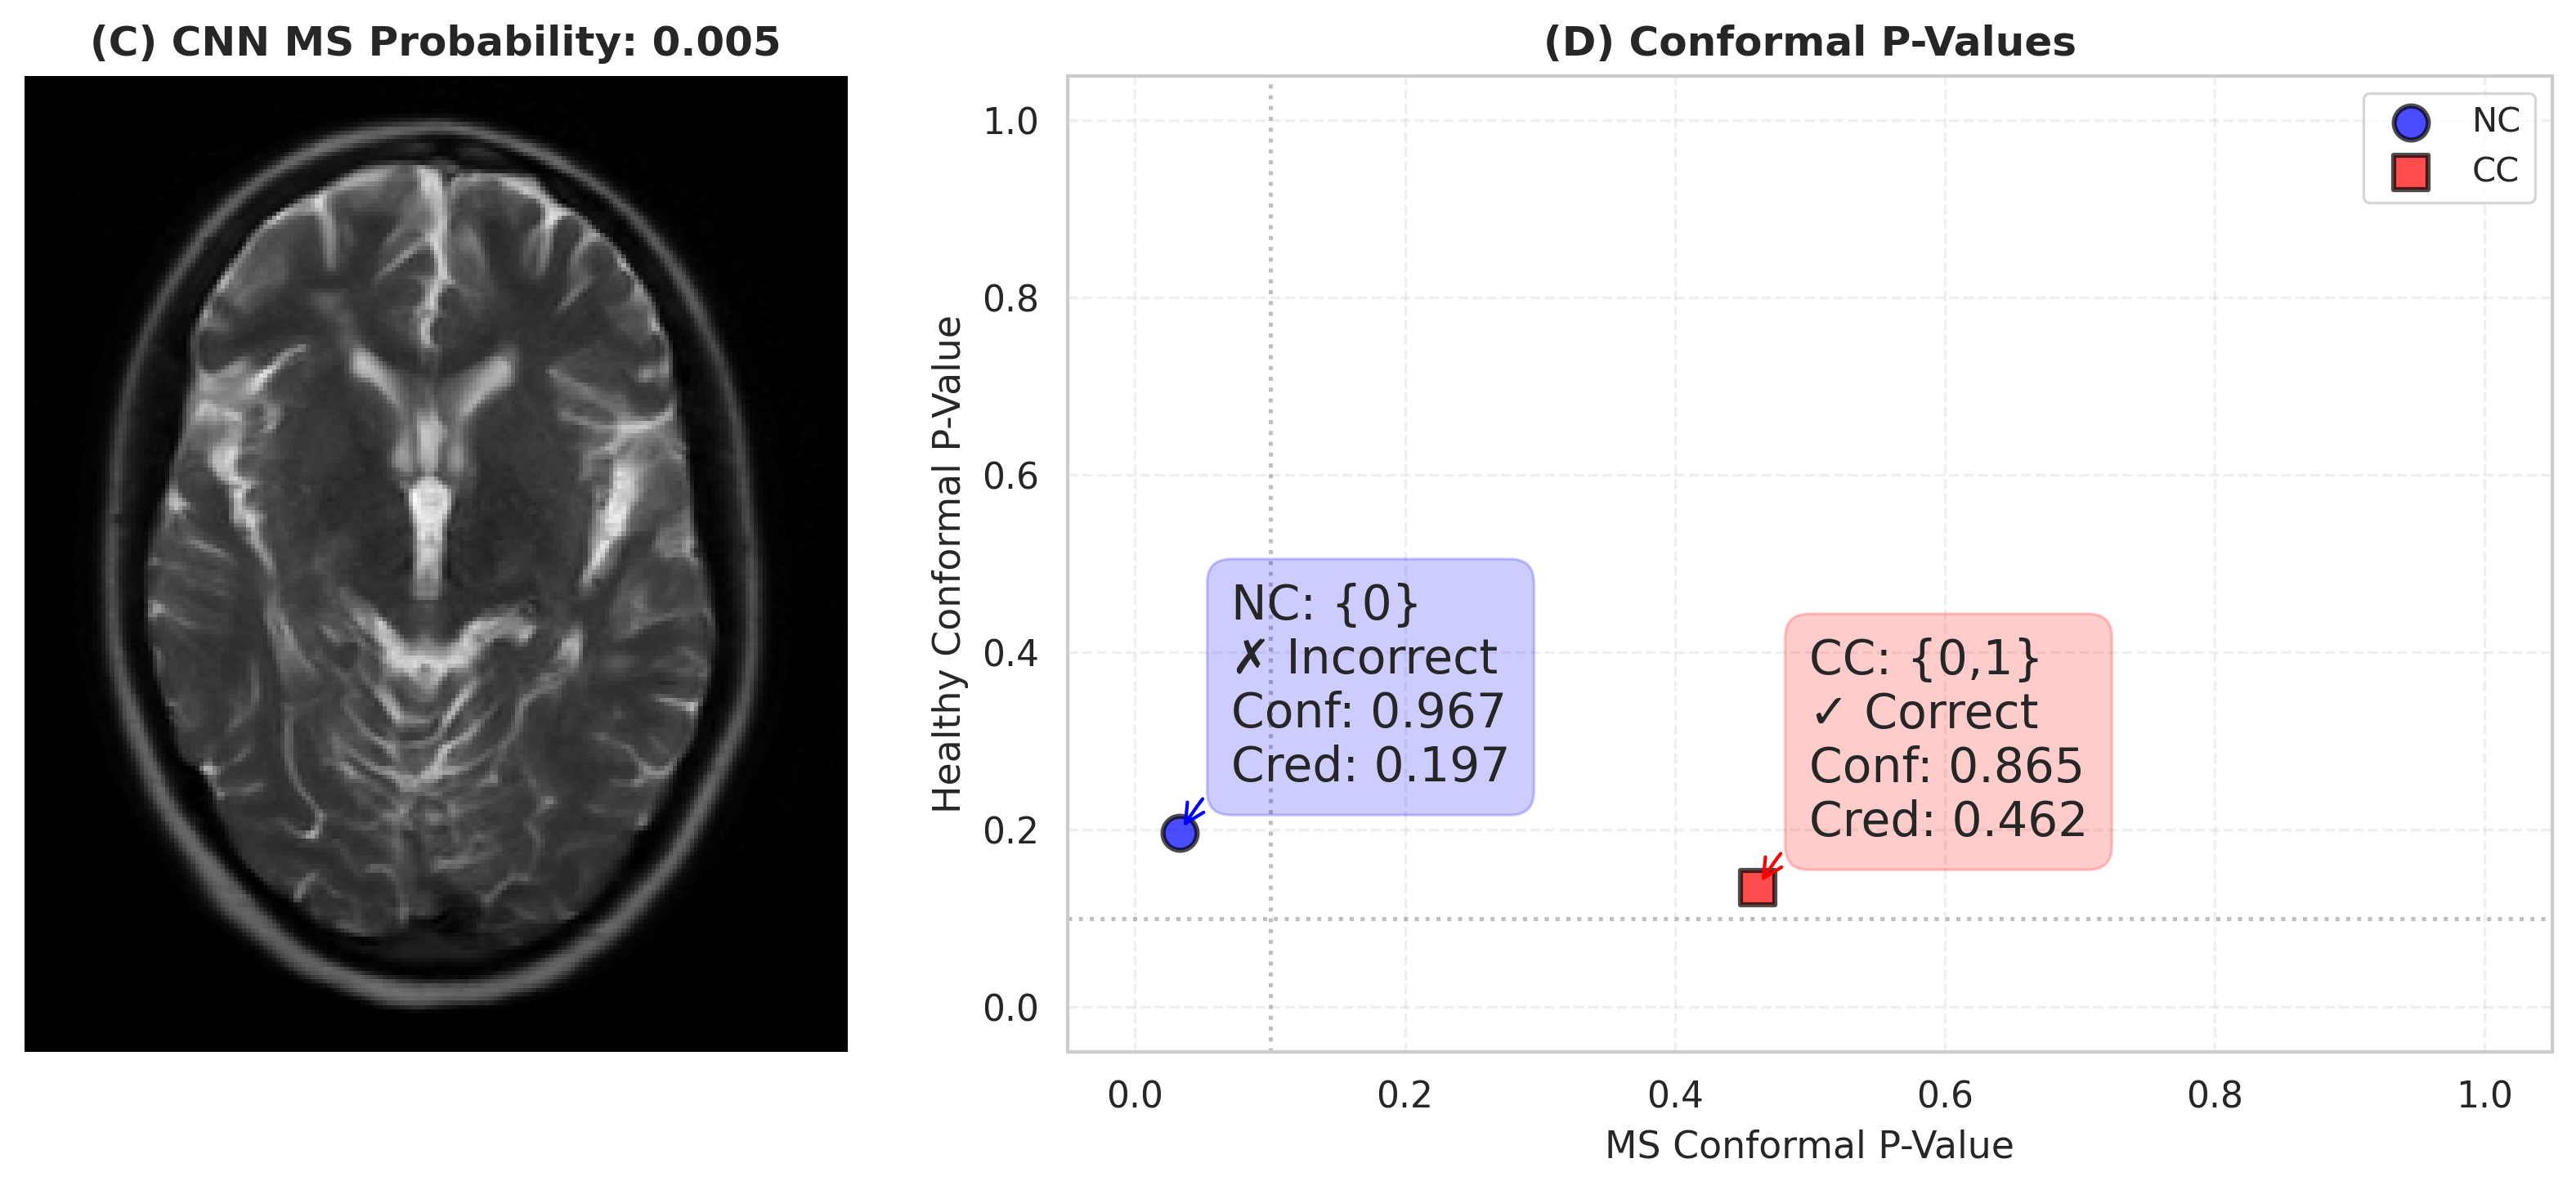

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

def create_ms_figure(slice_idx, df, image_path, panel_letter_1, panel_letter_2, 
                     cnn_ms_prob, prediction_info):
    """
    Create a two-panel figure for MS conformal prediction results
    
    Parameters:
    - slice_idx: slice index (82 or 100)
    - df: dataframe with conformal p-values
    - image_path: path to the MRI image
    - panel_letter_1, panel_letter_2: letters for the two panels 
        (e.g., 'A', 'B' or 'C', 'D')
    - cnn_ms_prob: CNN's MS probability
    - prediction_info: dict with NC and CC prediction details
      Format: {
        'NC': {'pred_set': str, 'correct': bool, 'conf': float, 'cred': float},
        'CC': {'pred_set': str, 'correct': bool, 'conf': float, 'cred': float}
      }
    """
    
    # Filter data for this specific slice
    slice_data = df[(df['scan_id']=='8') & (df['run']==99) & (df['slice_idx']==slice_idx)]
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Panel A: MRI Slice (rotated 90 degrees counter-clockwise)
    img = mpimg.imread(image_path)
    img_rotated = np.rot90(img)  # Rotate 90 degrees counter-clockwise
    ax1.imshow(img_rotated, cmap='gray')
    ax1.axis('off')
    ax1.set_title(f'({panel_letter_1}) CNN MS Probability: {cnn_ms_prob:.3f}', fontsize=12, fontweight='bold')
    
    # Panel B: Conformal P-Values Scatter Plot
    # Set up colors for different class_conditional values (boolean)
    colors = {False: 'blue', True: 'red'}
    markers = {False: 'o', True: 's'}  # Circle for NC, square for CC
    labels = {False: 'NC', True: 'CC'}  # Labels for legend
    
    for cc_type in slice_data['class_conditional'].unique():
        data_subset = slice_data[slice_data['class_conditional'] == cc_type]
        x_val = data_subset['pval_1'].values[0]
        y_val = data_subset['pval_0'].values[0]
        
        # Plot the point
        ax2.scatter(x_val, y_val,
                   c=colors[cc_type],
                   marker=markers[cc_type],
                   s=100,  # Large marker size
                   alpha=0.7,
                   edgecolors='black',
                   linewidth=1.5,
                   label=labels[cc_type])  # Use readable label for legend
        
        # Get annotation info for this method
        method_key = labels[cc_type]  # 'NC' or 'CC'
        ann = prediction_info[method_key]
        
        # Create annotation text
        correct_text = "✓" if ann['correct'] else "✗"
        annotation_text = (f"{method_key}: {ann['pred_set']}\n"
                          f"{correct_text} {'Correct' if ann['correct'] else 'Incorrect'}\n"
                          f"Conf: {ann['conf']:.3f}\n"
                          f"Cred: {ann['cred']:.3f}")
        
        # Position the annotation box - offset based on point location
        if x_val < 0.5 and y_val < 0.5:  # Bottom-left quadrant
            xytext = (15, 15)
            ha = 'left'
        elif x_val >= 0.5 and y_val < 0.5:  # Bottom-right quadrant
            xytext = (-15, 15)
            ha = 'right'
        elif x_val < 0.5 and y_val >= 0.5:  # Top-left quadrant
            xytext = (15, -15)
            ha = 'left'
        else:  # Top-right quadrant
            xytext = (-15, -15)
            ha = 'right'
        
        ax2.annotate(annotation_text,
                    xy=(x_val, y_val),
                    xytext=xytext,
                    textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', 
                             facecolor=colors[cc_type], 
                             alpha=0.2,
                             edgecolor=colors[cc_type]),
                    fontsize=14,
                    ha=ha,
                    arrowprops=dict(arrowstyle='->', 
                                  connectionstyle='arc3,rad=0.2',
                                  color=colors[cc_type],
                                  lw=1))
    
    # Set axis labels and properties
    ax2.set_xlabel('MS Conformal P-Value', fontsize=11)
    ax2.set_ylabel('Healthy Conformal P-Value', fontsize=11)
    ax2.set_xlim(-0.05, 1.05)
    ax2.set_ylim(-0.05, 1.05)
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.legend(loc='best', fontsize=10)
    ax2.set_title(f'({panel_letter_2}) Conformal P-Values', fontsize=12, fontweight='bold')
    
    # Add reference lines at 0.1 (typical significance level)
    ax2.axhline(y=0.1, color='gray', linestyle=':', alpha=0.5)
    ax2.axvline(x=0.1, color='gray', linestyle=':', alpha=0.5)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

# get valid for Muslim et al. examples
df = cp100[cp100['cal_test'].isin(['dv1.5T-cal_dv1.5T-test'])].copy()

# expand cp into dict {class: pval}
df_expanded = df['cp'].apply(lambda lst: {cls: p for p, cls in lst.p})

# create columns for each class
df['pval_0'] = df_expanded.apply(lambda d: d.get(0, None))
df['pval_1'] = df_expanded.apply(lambda d: d.get(1, None))

# create Figure 1 (slice 100) - CNN on the fence case
fig1 = create_ms_figure(
    slice_idx=100,
    df=df,
    image_path="./_MS__Muslim_et_al_15T/8/slice_100.png",
    panel_letter_1='A', 
    panel_letter_2='B', 
    cnn_ms_prob=0.501072,
    prediction_info={
        'NC': {'pred_set': '{}', 'correct': False, 'conf': 0.9518, 'cred': 0.0481},
        'CC': {'pred_set': '{1}', 'correct': True, 'conf': 0.9994, 'cred': 0.6692}
    }
)
plt.tight_layout()
plt.show()

# create Figure 2 (slice 82) - CNN very wrong case
fig2 = create_ms_figure(
    slice_idx=82,
    df=df,
    image_path="./_MS__Muslim_et_al_15T/8/slice_082.png",
    panel_letter_1='C', 
    panel_letter_2='D', 
    cnn_ms_prob=0.004974,
    prediction_info={
        'NC': {'pred_set': '{0}', 'correct': False, 'conf': 0.9667, 'cred': 0.1970},
        'CC': {'pred_set': '{0,1}', 'correct': True, 'conf': 0.8647, 'cred': 0.4615}
    }
)

plt.tight_layout()
plt.show()

# save figures
fig1.savefig('9-2-2__visualize_two_example_slices_contrasting_marginal_vs_class-conditional___on_the_fence.png', dpi=300, bbox_inches='tight')
fig2.savefig('9-2-2__visualize_two_example_slices_contrasting_marginal_vs_class-conditional___way_off.png', dpi=300, bbox_inches='tight')

---

---

---

---

---